In [1]:
from functions_for_all_nutrients import *
from iron_hemoglobin_functions import *

In [2]:
index_cols=['location_id','sex_id','age_group_id']

age_group_ids = [2,3,4,5]
sex_ids = [1,2]
coverage_levels = [0.2,0.5,0.8]
years = [2021,2022,2023,2024,2025]
location_ids = [163,179,214]

In [3]:
nutrient = 'iron'
vehicle = 'wheat flour'
effective_fractions = [0, 
                       0, 
                       0.1666666667, 
                       0.9166666667]

In [4]:
baseline_coverage, counterfactual_coverage = generate_overall_coverage_rates(
                                                     'temporary_coverage_data_3_3_21.csv',
                                                     nutrient, 
                                                     vehicle,
                                                     coverage_levels,
                                                     years,
                                                     location_ids,
                                                    ['under-5','total population',np.nan])

# HEMOGLOBIN

In [5]:
from scipy.stats import norm

# mean and 0.975-quantile of normal distribution for mean difference (MD)
mean = 3
q_975 = 6.1

# 0.975-quantile of standard normal distribution (=1.96, approximately)
q_975_stdnorm = norm().ppf(0.975)

std = (q_975 - mean) / q_975_stdnorm # std dev of normal distribution

# Frozen normal distribution for MD, representing uncertainty in our effect size
hb_md_distribution = norm(mean, std)

In [6]:
mean_difference_hemoglobin_fort = generate_normal_rr_deficiency_nofort_draws(mean, std, location_ids)
mean_difference_hemoglobin_fort.head()

draws,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
163,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
179,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
214,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852


In [7]:
effective_baseline_coverage = get_effective_iron_hemoglobin_coverage(baseline_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)
effective_counterfactual_coverage = get_effective_iron_hemoglobin_coverage(counterfactual_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)

delta_effective_coverage = effective_counterfactual_coverage - effective_baseline_coverage
delta_effective_coverage

draw_0    draw_1  \
location_id sex_id age_group_id year coverage_level                       
163         1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.121170  0.120864   
                                     0.8             0.285659  0.285538   
                                2025 0.2            -0.043320 -0.043811   
                                     0.5             0.121170  0.120864   
                                     0.8             0.285659  0.285538   

                                                       draw_2    draw_3  \
location_id sex_id age_group_id year coverage_level                       
163         1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.112044  0.127433   
                                     0.8             0.282052  0.288135   
                                2025 0.2            -0.057964 -0.033269   
                                     0.5             0.112044  0.127433   
                                     0.8             0.282052  0.288135   

                                                       draw_4    draw_5  \
location_id sex_id age_group_id year coverage_level                       
163         1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.126008  0.127203   
                                     0.8             0.287572  0.288044   
                                2025 0.2            -0.035555 -0.033638   
                                     0.5             0.126008  0.127203   
                                     0.8             0.287572  0.288044   

                                                       draw_6    draw_7  \
location_id sex_id age_group_id year coverage_level                       
163         1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.116804  0.123249   
                                     0.8             0.283934  0.286481   
                                2025 0.2            -0.050326 -0.039984   
                                     0.5             0.116804  0.123249   
                                     0.8             0.283934  0.286481   

                                                       draw_8    draw_9  ...  \
location_id sex_id age_group_id year coverage_level                    

In [8]:
mean_hgb = generate_hemoglobin_values(delta_effective_coverage, 
                                      mean_difference_hemoglobin_fort,
                                      location_ids, age_group_ids, sex_ids)
mean_hgb.to_csv('mean_hgb.csv')
mean_hgb

/ihme/homes/alibow/notebooks/vivarium_research_lsff/multiplication_models/iron_hemoglobin_functions.py:112: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ignore_index=True)


draw_0  \
location_id sex_id age_group_id year_id coverage_level               
163         1      2            NaN     baseline        150.882325   
                   3            NaN     baseline        125.060792   
                   4            NaN     baseline        104.595012   
                   5            NaN     baseline        106.365275   
            2      2            NaN     baseline        151.427331   
...                                                            ...   
214         2      5            2024.0  0.5             100.806476   
                                        0.8             101.739763   
                                2025.0  0.2              99.873189   
                                        0.5             100.806476   
                                        0.8             101.739763   

                                                            draw_1  \
location_id sex_id age_group_id year_id coverage_level               
163         1      2            NaN     baseline        152.169470   
                   3            NaN     baseline        124.545652   
                   4            NaN     baseline        103.273438   
                   5            NaN     baseline        106.588611   
            2      2            NaN     baseline        151.008755   
...                                                            ...   
214         2      5            2024.0  0.5             102.112823   
                                        0.8             102.485489   
                                2025.0  0.2             101.740157   
                                        0.5             102.112823   
                                        0.8             102.485489   

                                                           draw_10  \
location_id sex_id age_group_id year_id coverage_level               
163         1      2            NaN     baseline        151.189820   
                   3            NaN     baseline        124.095083   
                   4            NaN     baseline        103.700754   
                   5            NaN     baseline        106.488775   
            2      2            NaN     baseline        153.620549   
...                                                            ...   
214         2      5            2024.0  0.5              98.742043   
                                        0.8              99.077260   
                                2025.0  0.2              98.406826   
                                        0.5              98.742043   
                                        0.8              99.077260   

                                                          draw_100  \
location_id sex_id age_group_id year_id coverage_level               
163         1      2            NaN     baseline        152.439651   
                   3            NaN     baseline        123.806288   
                   4            NaN     baseline        104.099033   
                   5            NaN     baseline        106.791557   
            2      2            NaN     baseline        152.565853   
...                                                            ...   
214         2      5            2024.0  0.5             100.605878   
                                        0.8             100.866761   
                                2025.0  0.2             100.344994   
                                        0.5             100.605878   
                                        0.8             100.866761   

                                                          draw_101  \
location_id sex_id age_group_id year_id coverage_level               
163         1      2            NaN     baseline        152.105024   
                   3            NaN     baseline        123.624327   
                   4            NaN     baseline        103.851905   
                   5            NaN     baseline        106.795405

In [9]:
anemia = load_anemia_prev_and_calculate_ylds('baseline_anemia_prev.csv')
baseline_anemia = (duplicate_over_simulation_years(anemia.loc[anemia.coverage_level=='baseline'], years)
                   .drop(columns='coverage_level')
                   .set_index(['location_id','age_group_id','sex_id','year','draw']))
counterfactual_anemia = (anemia.loc[anemia.coverage_level != 'baseline']
                         .set_index(['location_id','age_group_id','sex_id','year','draw','coverage_level']))
averted_anemia = baseline_anemia - counterfactual_anemia
averted_anemia

mild  \
location_id age_group_id sex_id year draw     coverage_level             
163         2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.000228   
                                              0.8             0.000724   
                                     draw_999 0.2            -0.000117   
                                              0.5             0.000348   
                                              0.8             0.000935   

                                                              moderate  \
location_id age_group_id sex_id year draw     coverage_level             
163         2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.005893   
                                              0.8             0.014665   
                                     draw_999 0.2            -0.002056   
                                              0.5             0.005325   
                                              0.8             0.012668   

                                                                severe  \
location_id age_group_id sex_id year draw     coverage_level             
163         2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.000489   
                                              0.8             0.001196   
                                     draw_999 0.2            -0.000240   
                                              0.5             0.000611   
                                              0.8             0.001432   

                                                                anemic  \
location_id age_group_id sex_id year draw     coverage_level             
163         2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.006610   
                                              0.8             0.016585   
                                     draw_999 0.2            -0.002413   
                                              0.5             0.006284   
                                              0.8             0.015034   

                                                                 mild_ylds  \
location_id age_group_id sex_id year draw     coverage_level                 
163         2            1      2021 draw_0   0.2         

In [10]:
counts, rates = population_weight_values(averted_anemia.reset_index(), age_group_ids, sex_ids, location_ids)

In [12]:
counts = summarize_data(counts)
rates = summarize_data(rates)

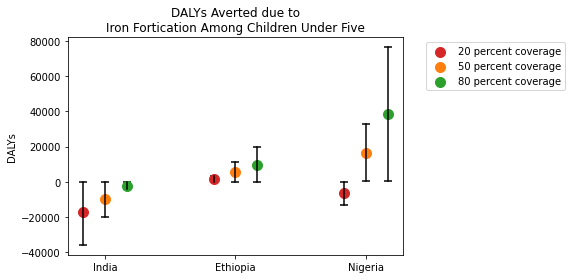

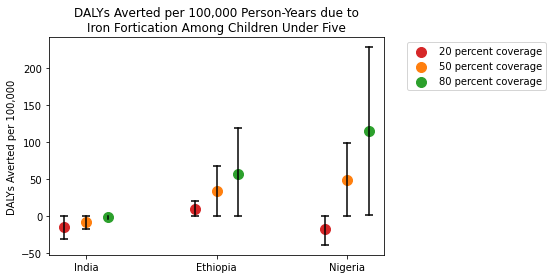

In [13]:
make_india_ethiopia_nigeria_plots(
    (counts.loc[counts.severity=='anemic']
     .loc[counts.measure=='ylds']
     .set_index(['location_id','year','coverage_level'])
     .drop(columns=['severity','measure'])), 
    'Iron', 
    'counts', 
    coverage_levels)

make_india_ethiopia_nigeria_plots(
    (rates.loc[rates.severity=='anemic']
     .loc[rates.measure=='ylds']
     .set_index(['location_id','year','coverage_level'])
     .drop(columns=['severity','measure'])), 
    'Iron', 
    'rates', 
    coverage_levels)

In [14]:
# need to incorporate iron responsive anemia PIF and plot
# need to load denominator and then divide counts... to be incorporated

# LBWSG to be added ....